# EDS232 Lab 1: Regression

## General Lab Template
1. Look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data for machine learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.

## Overview
In this lab, we will introduce the basics of machine learning in **Python** by focusing on **regression**, a core technique used to predict continuous outcomes. We will use the popular **scikit-learn** library, which provides easy-to-use tools for building and evaluating machine learning models.
Specifically, we will focus on how regression algorithms can help us model and predict abalone data.

## Objectives
By the end of this lab, you will be able to:
- Understand the concept of regression and its implementation in Pythnon
- Implement simple and multiple linear regression models
- Evaluate model performance using various metrics like **R²**, **MAE**, and **RMSE**
- Visualize regression prediction results 

## Key Concepts
- **Machine Learning**: A subset of artificial intelligence where algorithms learn patterns from data to make predictions or decisions without being explicitly programmed.
- **Regression**: A machine learning method for predicting continuous values.
  - **Simple Linear Regression**: A regression model with one independent variable.
  - **Multiple Linear Regression**: A regression model with two or more independent variables.
  
- **Scikit-learn**: A Python library that provides simple and efficient tools for data mining and machine learning. We will use it for:
  - **Data Preprocessing**: Preparing data for the model.
  - **Model Training**: Fitting the regression model to our data.
  - **Model Evaluation**: Assessing model performance using model evaluation metrics

- **Model Evaluation Metrics**: Tools to assess how well our model fits the data, such as:
  - **R² (R-squared)**: Measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).
  - **MAE (Mean Absolute Error)**: The average of the absolute differences between predicted and actual values.
  - **RMSE (Root Mean Square Error)**: The square root of the average squared differences between predicted and actual values.



### Step 1: Import libraries and load data


#### About the data

- We will be working with data dealing with physical abalone features. This dataset has observations of more than 4,000 abalone, measuring their length, diameter, height, and different rings. The data can be found here : https://archive.ics.uci.edu/dataset/1/abalone. 


- Notice that the data is not a csv file and is instead a .data file! The .data file does not contain any column names, so we therefore need to specify the column names when we read our data in using `pd.read_csv`. Look at the metadata and assign column names to the data. When you are finished, look at the head of the dataframe to ensure it looks correct. 


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# URL to the Abalone dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Define column names based on the UCI repository documentation
column_names = [
    "Sex", "Length", "Diameter", "Height", 
    "Whole_weight", "Shucked_weight", "Viscera_weight", 
    "Shell_weight", "Rings"
]

# Load the dataset
df = pd.read_csv(url, names=column_names)

# Display the first few rows
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Step 2: Explore the data

Do some initial exploratory analysis on the data. Check out what type of data you are working with, and create a few plots of your data. Do any combinations of predictor variables look very linear? Do any look exponential? Play around with different potential x and y variables. 

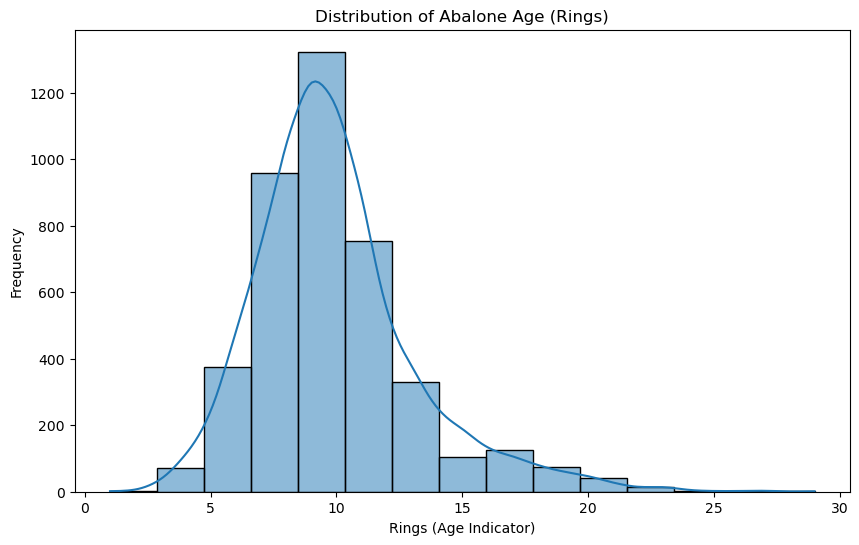

In [11]:
# Explore and Visualize data 
# ex: scatterplot, correlation matrix

# Plot the distribution of Rings (Age Indicator)
plt.figure(figsize=(10, 6))
sns.histplot(df['Rings'], bins=15, kde=True)
plt.title('Distribution of Abalone Age (Rings)')
plt.xlabel('Rings (Age Indicator)')
plt.ylabel('Frequency')
plt.show()

### Step 3: Prepare the data for Machine Learning

It is time to split our data into training and testing data for our linear regression model. Split your training and testing data where `Shucked_weight` is your predictor variable and `Whole_weight` is you response variable. 

In [14]:
# Prepare the Data for Machine Learning 
# Preprocessing: handling missing values, feature scaling, splitting data into training/test 
# train_test_split()

X = df[['Shucked_weight']]
Y = df[['Whole_weight']]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

### Step 4: Select your model

We are going to use linear regression to predict the whole weight of oysters. Why is linear regression a good model to pick to achieve this goal? Answer in the markdown cell below.

*Your answer here*.

In [16]:
# Select and Train Model
# Import and create regression model using LinearRegression() from scikit-learn
# Train the model on training data with .fit()

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Step 5: Evaluate the model

- Make predictions with your model and check the performance of the model after.
- Check how your model perfromed by look at the mean squared error and the $R^2$ score.
- Create a scatter plot of the Y predictions and your Y test data. 

Mean Squared Error: 0.015153810602167405
R² Score: 0.9354005994620787


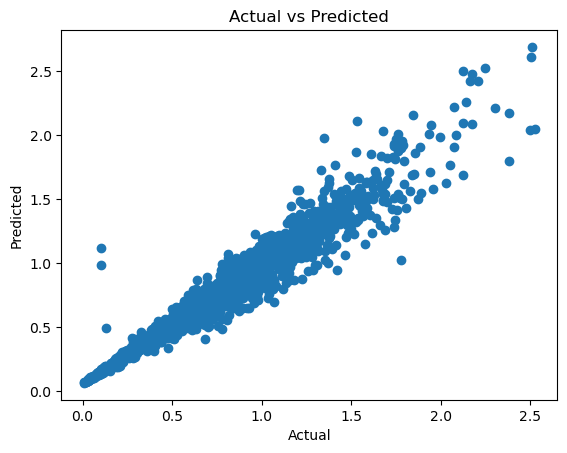

In [96]:
#Evaluate the Model 
#Predict target variable on the test set and calculate evaluation metrics using scikit-learn's mean_squared_error adn r2_score
#Visualize predictions vs. actual values

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot predictions vs actual
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


### Step 6: Fine tune the model

Get the cross validation score to see how your model performed across the different folds. In the markdown cell below, explain what cross valiadtion is and what the cross validation score represents. 

*Type your answer here.*

In [97]:
#Fine-tune the Model 
#Use cross_val_score() to fine-tune the model

from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {-scores}")


Cross-validation scores: [0.01164572 0.01567289 0.01638338 0.01406697 0.01325673]


### Step 7:  Present the Solution
In the markdown cell below, discuss how your model performed overall. If the model performed poorly, why do you think it did so? If it performed well, why do you think it did so? What could future analysis include? 

### Step 8: Check to see if polynomial regression performs better

We assumed linear regression would work best with our data, but lets check to see how a polynomial regression performs in comparison. Transform the features for polynomial regression. Use the `PolynomialFeatures` library from `sklearn.preprocessing`. 

In [98]:
# Transform features for polynomial regression 

from sklearn.preprocessing import PolynomialFeatures

# Transform features to include polynomial terms (degree 2 for quadratic terms)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# View the transformed feature set (for insight)
print(X_poly_train)

[[1.       0.261    0.068121]
 [1.       0.172    0.029584]
 [1.       0.297    0.088209]
 ...
 [1.       0.244    0.059536]
 [1.       0.516    0.266256]
 [1.       0.547    0.299209]]


### Step 9: Fit your model on the polynomial features

In [99]:
# Train the model on polynomial features 
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)

LinearRegression()

### STEP 10: Evaluate the polynomial regression model 
- Make predictions with your model and check the performance of the model after.
- Check how your model perfromed by look at the mean squared error and the $R^2$ score.
- Create a scatter plot of the Y polynomial predictions and your Y test data.

Polynomial Regression Mean Squared Error: 0.014221321667375457
Polynomial Regression R² Score: 0.9393757201612372


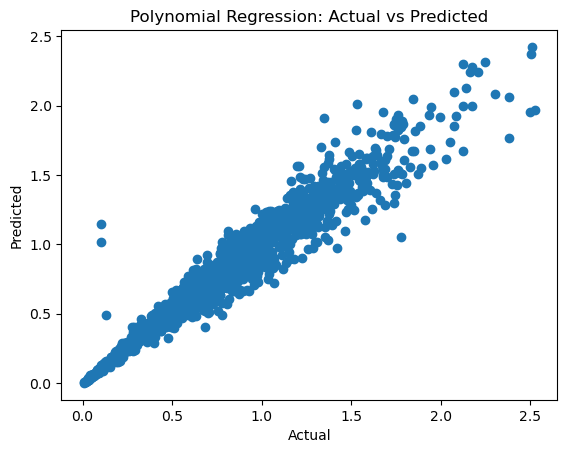

In [100]:
# Evaluate the polynomial regression model
# Make predictions using the polynomial model
Y_poly_pred = poly_model.predict(X_poly_test)

# Evaluate the polynomial model
poly_mse = mean_squared_error(Y_test, Y_poly_pred)
poly_r2 = r2_score(Y_test, Y_poly_pred)

print(f"Polynomial Regression Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression R² Score: {poly_r2}")

# Plot predictions vs actual
plt.scatter(Y_test, Y_poly_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

### Step 11: Compare your polynomial and linear regression results

What differences did you notice between you polynomial regression and linear regression results? Which model performed better? Why do you think this is? Write your answer in the markdown cell below. 

*Your answer here.*

Notes: 

- X = height, y = weight : r^2 = .73, polynomial = .75
- x = diameter, y = weight: r^2 = .85, polynomial = .92 ( polynomial curve ) 
- x = shucked weight, y = weight, r^2 = .93, polynomial = .93 ( data looks very linear) 



Ideas for discussion: 
- multiple linear regression
- interpretation excercise